In [4]:
import pandas as pd
from mlflow.tracking import MlflowClient
import numpy as np

from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc
from src.database.mlflow import MLFlowClient
from src.database.mlflow import MLFlowClient
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')



/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/data_analysis/analysis_helpers.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from pandas import np


In [5]:
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

######## FOR KMEANS CENTROIDS MAX_EPOCHS=30
runs_30_epochs = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k", "params.learning_rate", "params.max_epochs", "params.optimizer"],[True, True, True, True, True, True, True],["centroids", "margin", "kmeans",1000, 0.01, 30, "Adam"])
print(len(runs_30_epochs))
run_ids_30_epochs = get_run_ids(runs_30_epochs)

10


In [9]:
######## FOR KMEANS CENTROIDS MAX_EPOCHS=50
runs_50_epochs = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k", "params.learning_rate", "params.max_epochs", "params.optimizer"],[True, True, True, True, True, True, True],["centroids", "margin", "kmeans", 1000, 0.01, 50, "Adam"])
print(len(runs_50_epochs))
run_ids_50_epochs = get_run_ids(runs_50_epochs)

10


In [ ]:
samples_labeled_30_epochs, avg_accs_30_epochs = get_labeledSamples_avgAcc(run_ids_30_epochs, tracking)
samples_labeled_50_epochs, avg_accs_50_epochs = get_labeledSamples_avgAcc(run_ids_50_epochs, tracking)

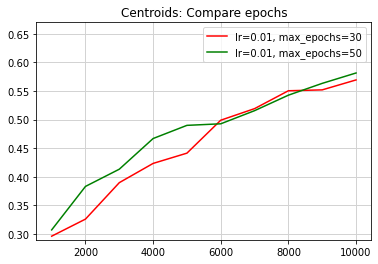

In [8]:
# plot
plt.plot(samples_labeled_30_epochs, avg_accs_30_epochs,color='red', label='lr=0.01, max_epochs=30')
plt.plot(samples_labeled_50_epochs, avg_accs_50_epochs,color='green', label='lr=0.01, max_epochs=50')
plt.legend()
plt.title(f"Centroids: Compare epochs")
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.67])
plt.show()